In [2]:
import numpy as np
import matplotlib.pyplot as plt

(914, 768, 3)
uint8


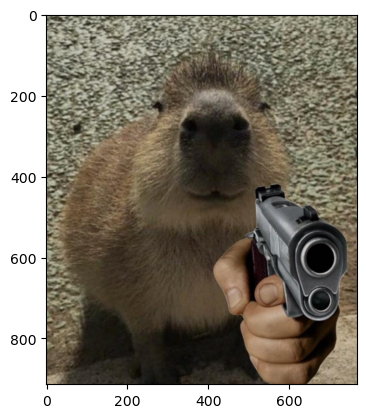

In [3]:
I = plt.imread("./capybara.jpg")
plt.imshow(I)
print(I.shape)
print(I.dtype)

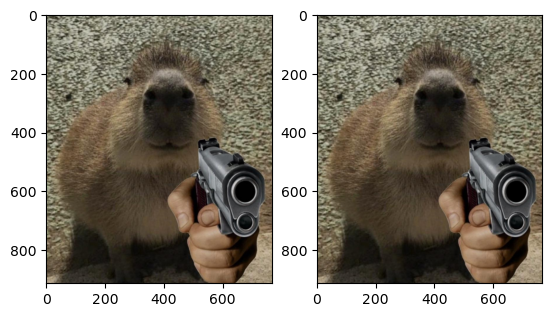

In [4]:
IRound = I - I%2

plt.subplot(121)
plt.imshow(I)
plt.subplot(122)
plt.imshow(IRound)

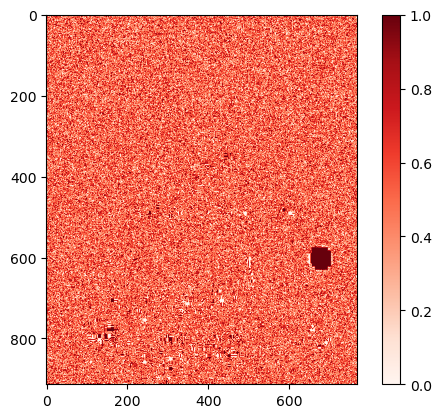

In [5]:
plt.imshow(I[:, :, 0]%2, cmap='Reds')
plt.colorbar()

In [10]:


def get_bin_char(c):
    """
    Return a list of 1's and 0's corresponding to the
    ASCII encoding of a character
    """
    x  = [int(x) for x in bin(ord(c))[2:]]
    x = [0]*(7-len(x)) + x
    return x

def get_bin_str(s):
    """
    Return a list of 1's and 0's corresponding to the
    ASCII encoding of a character or string
    """
    ret = []
    for c in s:
        ret += get_bin_char(c)
    ret += [0]*7 # Add on null terminator "\0"
    return ret

x = get_bin_str("Steganography")
print(x)

[1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


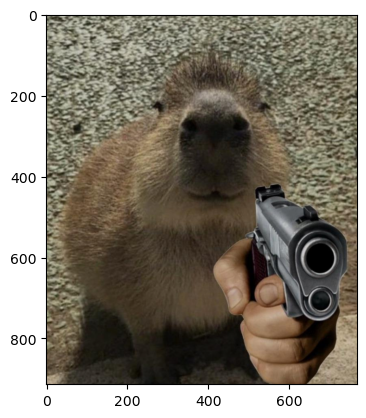

In [11]:
def encode(I, s):
    """
    Hide the string s in its ASCII representation inside
    of the least significant bit of image I
    
    Parameters
    ----------
    I: ndarray(rows, cols, 3)
        Carrier image
    s: string
        Hidden message string
    """
    ## Step 1: Get the binary string to hide
    x = get_bin_str(s)
    x = x + [0]*7
    x = np.array(x, dtype=np.uint8)
    ## Step 2: Round down the image to nearest even
    IRound = I - I%2
    ## Step 3: Put the binary data in some systematic
    ## order in the image
    IRound = IRound.flatten()
    IRound[0:x.size] += x # Adding in hidden bits
    return np.reshape(IRound, I.shape)

IEnc = encode(I, "Steganography")
plt.imshow(IEnc)

In [13]:
def decode(IEnc):
    places = np.array([2**(6-i) for i in range(7)])
    IDec = IEnc.flatten()
    i = 0
    still_reading = True
    s = ""
    while still_reading:
        c = IDec[i:i+7] % 2
        c = np.sum(places*c)
        if c == 0:
            still_reading = False
        else:
            s += chr(c)
        i += 7
    return s

I2 = encode(I, "Kelompok 5 Kejarkom")
print(decode(I2))

Kelompok 5 Kejarkom


In [17]:
import skimage.io

In [20]:
skimage.io.imsave("./cia.png", I2) 

In [21]:
ILoad = skimage.io.imread("./cia.png")
decode(ILoad)

'Kelompok 5 Kejarkom'